#  Regression

What is regression:
Regression is a statistical relationship between 2 or more variables where a change in independant variable is assosiated with a change in dependant vsariable


exmample,  the change in one variable ( height) is closely assiated with the change in other vairable (age)
regression line= regression line= line of the best fit 
types os regressions :
- linear regression   ( the most well known)
- Logitic regression  ( when the y value in the graph is cateofrical in nature ( i.e Yes/No) and depends on the X variable
- Polynomial regression ( When the realtion betwen the dependant vairable Y and the independant variable X is in nth degree of X
### Why logistic regression 
- Linear regression answers th equestion "How Much". It's used to predict the continous variable
- Logistic regression answers the question " Will it happen or not". It's use dwhen the response variable has noly two outcomes ( yes/no or 0 and 1 )

## example:

In [1]:
company <- data.frame(Funding=5:10, Profit=c(12, 13, 16, 18,19, 20))

In [2]:
cor(company$Funding, company$Profit)

[1] 0.9819805

In [4]:
library(ggplot2)

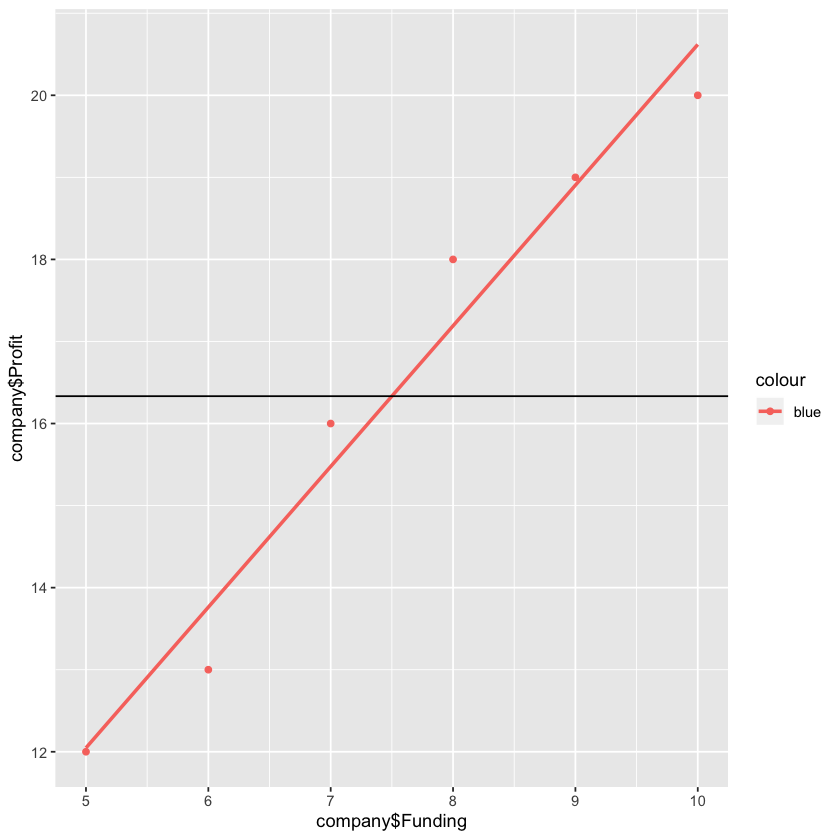

In [5]:
profitLM<-lm(company$Funding ~ company$Profit)
coeff=coefficients(profitLM)
eq = paste("y = ", round(coeff[2],1), "*x ", round(coeff[1],1))

ggplot(company, aes(company$Funding , company$Profit, col="blue" ) )+
geom_point( ) +
geom_smooth( method=lm, se=F)+
geom_hline( yintercept = mean(company$Profit))

#plot( company$Funding ~ company$Profit , xlab=" Funding", ylab=" Profit", main=eq)
#abline(profitLM,  col="red")
#abline(h=9, col="purple", lty=2, lwd=4)
#mean(company$Profit)

### Root Mean Squared Error, which measures the model prediction error. 
### It corresponds to the average difference between the observed known values of the outcome 
### and the predicted value by the model. RMSE is computed as
RMSE = mean((observeds - predicteds)^2) %>% sqrt()
### The lower the RMSE, the better the model.
- R-square, representing the squared correlation between the observed known outcome values and the predicted values by the model. The higher the R2, the better the model.

In [299]:
install.packages("tidyverse")
install.packages("caret")
library(tidyverse)
library(caret)
theme_set(theme_bw())

also installing the dependencies ‘ps’, ‘processx’, ‘openssl’, ‘callr’, ‘fs’, ‘httr’, ‘reprex’, ‘rvest’

Warning message in install.packages("tidyverse"):
“installation of package ‘ps’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘openssl’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘fs’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘processx’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘httr’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘callr’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘rvest’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘reprex’ had non-zero exit status”Warning message in install.packag

ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


In [300]:
# Load the data
data("marketing", package = "datarium")
# Inspect the data
sample_n(marketing, 3)
head(marketting)

ERROR: Error in find.package(package, lib.loc, verbose = verbose): there is no package called ‘datarium’


In [ ]:
set.seed(123)
training.samples <- marketing$sales %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- marketing[training.samples, ]
test.data <- marketing[-training.samples, ]

In [ ]:
5+6

# Logistic regression   الانحدار اللوجستي

In [30]:
# تحميل البيانات
library(datasets)
data<- iris
head(data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [10]:
# اظهار هيكل البيانات
str(data)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [11]:
#Species تعرف اصناف المتغير 
levels(data$Species)

[1] "setosa"     "versicolor" "virginica"

In [12]:
#We should check whether we have any NA values in our dataset;
#  التآكد من البيانات لا تحوي قيم خالية  
sum(is.na(data))

[1] 0

In [13]:
# let’s subset the data so that we have to deal with 2 species of plants rather than 3 (because logistic regression will be built on binary outcomes)
#Petal.Length تحديد البيانات التي سيطالها نموذج الانحدار اللوجستي بحيث سيتم التنبؤ بنوعية الزهرة بناء على المتغير 
# سيتم الاكتفاء بنوعين من الورود والتي تتواجد ضمن ال 100 صف الأولى
data<-data[1:100,]

In [14]:
# Also we will randomly define our Test and Control groups;
# تقسيم البيانات إلى مجموعتين: الأولى للتدريب والثانية للاختبار
set.seed(100)
samp<-sample(1:100,80)
iris_test<-data[samp,]
iris_ctrl<-data[-samp,]

In [15]:
#We will use the test set to create our model and control set to check our model. 
#Now, lets explore the dataset a little bit more with the help of plots;
#ggplot2  تحميل. مكتبة التخطيطات البيانية 
library(ggplot2); library(GGally)

Warning message:
“package ‘GGally’ was built under R version 3.4.4”


In [26]:
?ggpairs

In [27]:
mean(iris$Petal.Length)

[1] 3.758

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



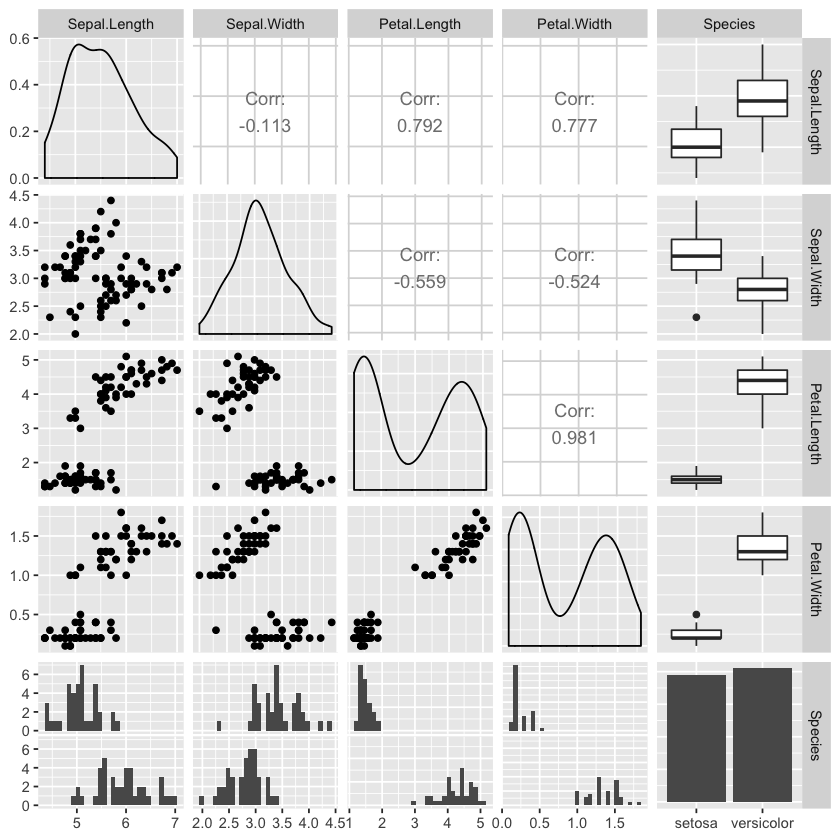

In [28]:
ggpairs(iris_test)

In [16]:
# model this data using Logistic Regression
#  نموذج الانجدار اللوجستي 
y<-iris_test$Species; x<-iris_test$Sepal.Length
glfit<-glm(y~x, family = 'binomial')

In [17]:
# let us have a look at the model itself.
# تلخيص   نموذج الانجدار اللوجستي 
summary(glfit)


Call:
glm(formula = y ~ x, family = "binomial")

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.94538  -0.50121   0.04079   0.45923   2.26238  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -25.386      5.517  -4.601 4.20e-06 ***
x              4.675      1.017   4.596 4.31e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 110.854  on 79  degrees of freedom
Residual deviance:  56.716  on 78  degrees of freedom
AIC: 60.716

Number of Fisher Scoring iterations: 6


In [21]:
# Checking Model’s Predictions 
# توظيف   نموذج الانجدار اللوجستي  للتنبؤ  
newdata<- data.frame(x=iris_ctrl$Sepal.Length)
predicted_val<-predict(glfit, newdata, type="response")
prediction<-data.frame(iris_ctrl$Sepal.Length, iris_ctrl$Species,predicted_val)
prediction
# probability our model is predicting for a given plant to be ‘versicolor’ based on its ‘sepal length’.

,iris_ctrl.Sepal.Length,iris_ctrl.Species,predicted_val
,<dbl>,<fct>,<dbl>
1,5.1,setosa,0.176005274
2,4.7,setosa,0.031871367
3,4.6,setosa,0.020210042
4,5.0,setosa,0.118037011
5,4.6,setosa,0.020210042
6,4.3,setosa,0.005048194
7,4.6,setosa,0.020210042
8,5.2,setosa,0.254235573
9,5.2,setosa,0.254235573


In [22]:
names(prediction)

[1] "iris_ctrl.Sepal.Length" "iris_ctrl.Species"      "predicted_val"

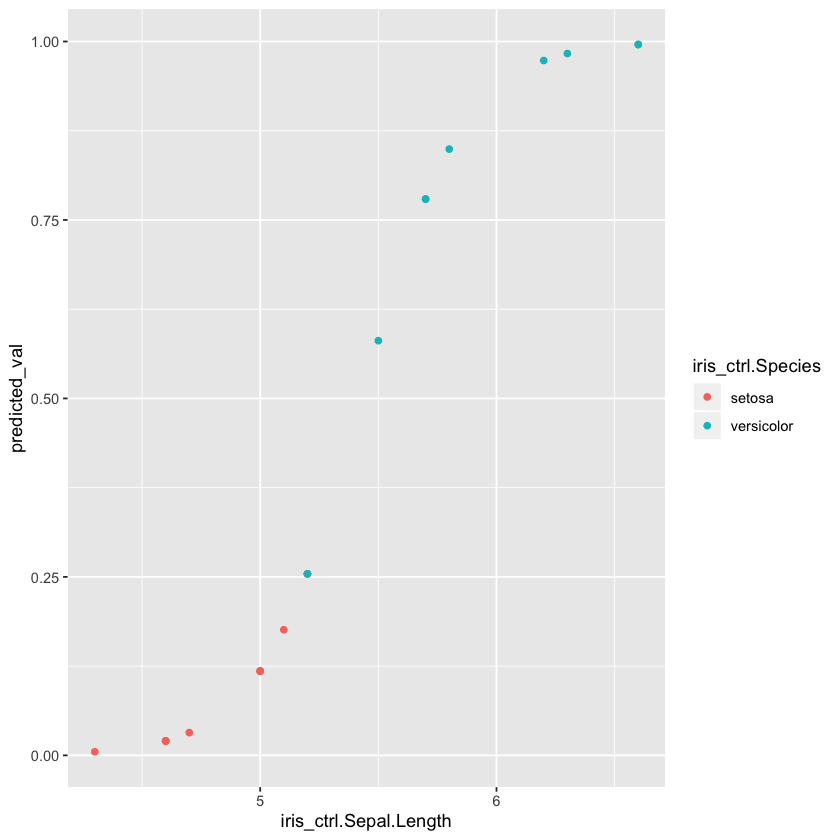

In [25]:
# رسم التخطيط البياني لنتيجة نموذج الانجدار اللوجستي 
ggplot(prediction)+
geom_point(aes(iris_ctrl.Sepal.Length, predicted_val  ,col=iris_ctrl.Species))

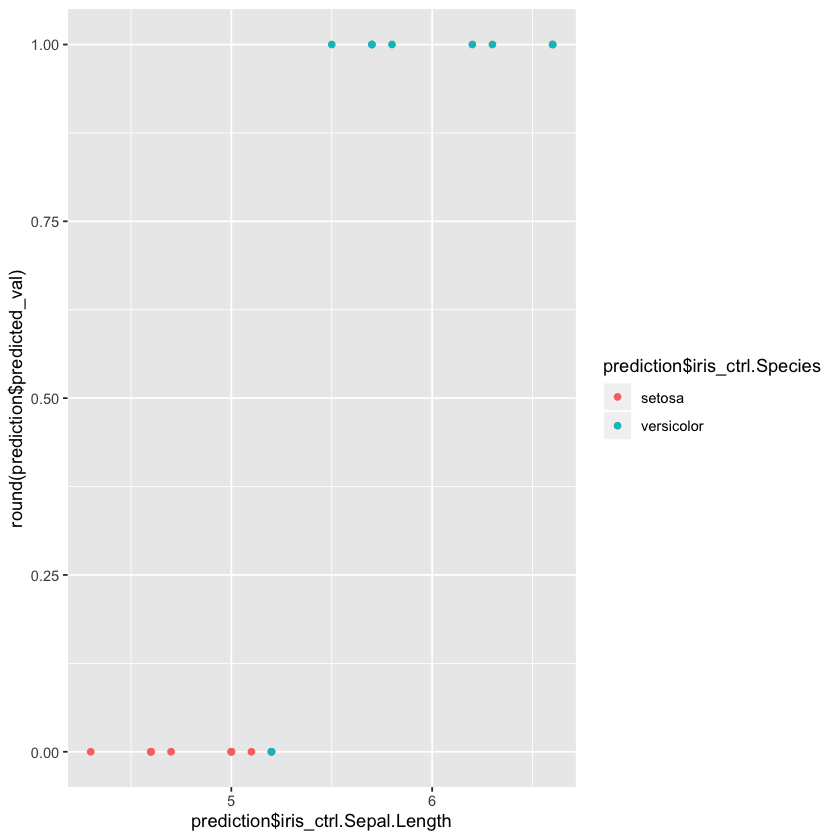

In [40]:
#المخرجات  binomial  رسم تخطيط بياني ثنائي     
ggplot(prediction, aes(prediction$iris_ctrl.Sepal.Length, round(prediction$predicted_val)))  +
geom_point(   aes(colour=prediction$iris_ctrl.Species))

# Function     Sigmoid   الدّالة    

In [48]:
#we can define a function in R.

sigmoid <- function(x) {
   1 / (1 + exp(-x))
}

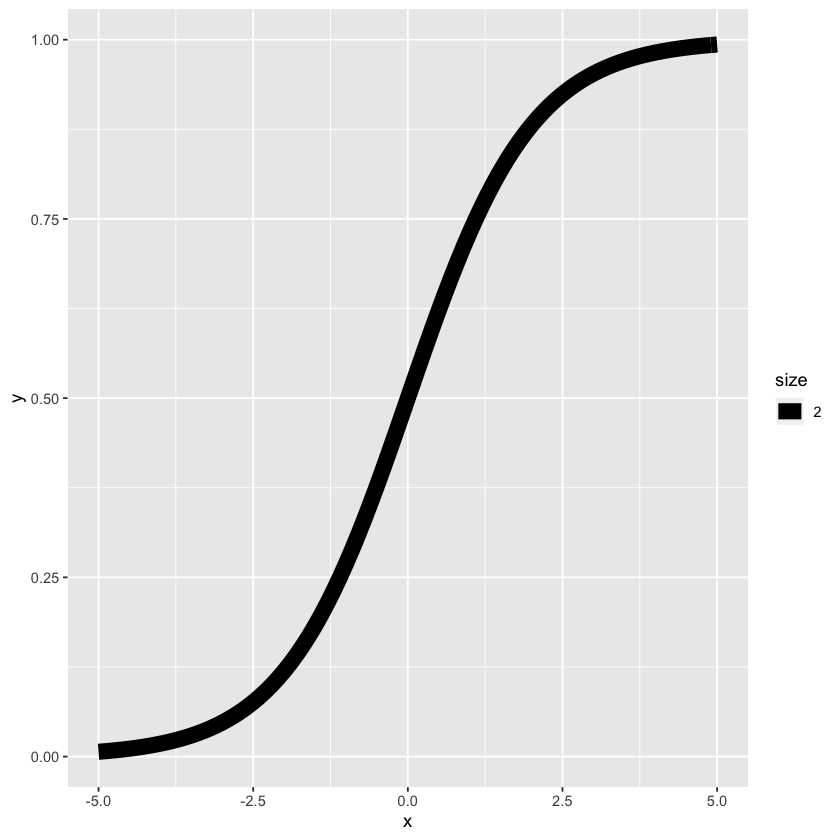

In [49]:
#sigmoid رسم تخطيط بياني للدّالة   
ggplot()+
stat_function(aes(seq(-5, 5, 0.01), lwd=2), fun = sigmoid) + 
    xlab("x")

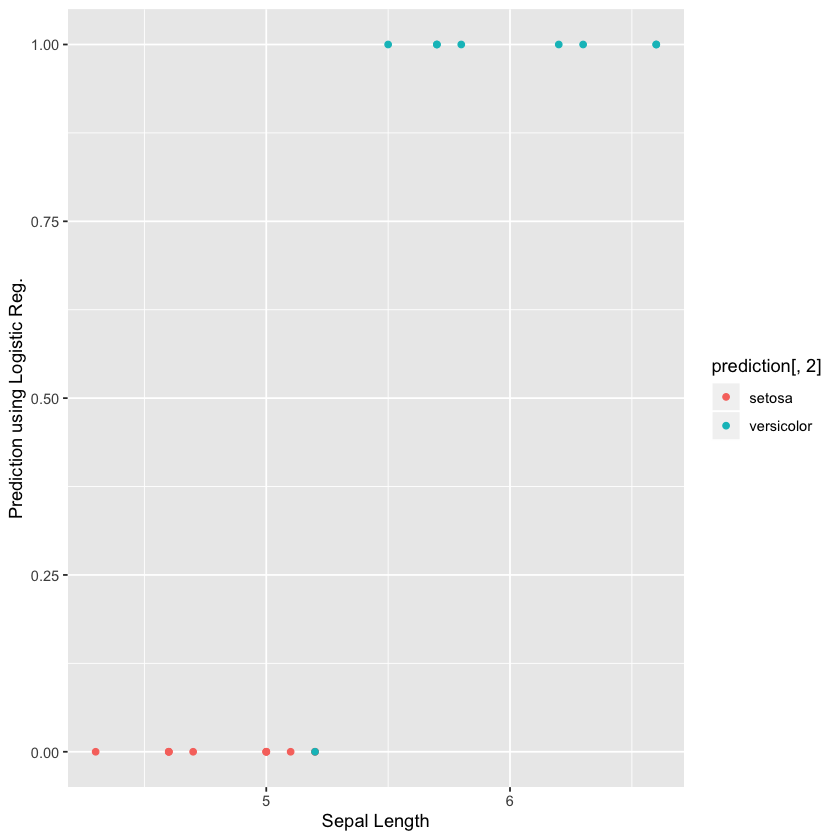

In [26]:
#Let’s say that we will consider any plant to be ‘versicolor’ 
#if its probability for the same is more than 0.5;
qplot(prediction[,1], round(prediction[,3]), col=prediction[,2], 
      xlab = 'Sepal Length', ylab = 'Prediction using Logistic Reg.')

In [42]:
# you can use the equal sign as well, the programmer way.
x <- seq(-5, 5, 0.01)

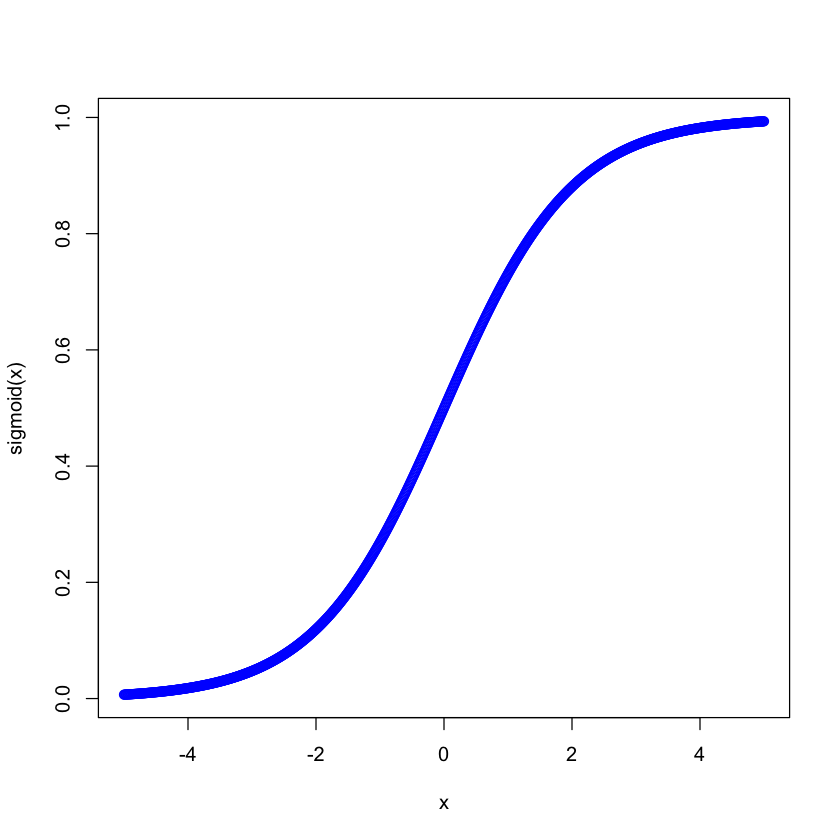

In [43]:
plot(x, sigmoid(x), col='blue')

### انحدار لوجستي بناء على متغيرات مستقلة متعدّدة

In [50]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [51]:
names(mtcars)

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

In [52]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [124]:
head(mtcars[,c(2, 4,6,9)])

,cyl,hp,wt,am
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,6,110,2.620,1
Mazda RX4 Wag,6,110,2.875,1
Datsun 710,4,93,2.320,1
Hornet 4 Drive,6,110,3.215,0
Hornet Sportabout,8,175,3.440,0
Valiant,6,105,3.460,0


In [144]:
#We use the glm() function, include the variables in the usual way, 
#and specify a binomial error distribution, as follows:
#    نموذج الانحدار اللوجستي 
glmModel <- glm(formula= am ~  cyl + hp + wt , data=mtcars[,c(2, 4,6,9)], family=binomial)

In [160]:
summary(glmModel)


Call:
glm(formula = am ~ cyl + hp + wt, family = binomial, data = mtcars[, 
    c(2, 4, 6, 9)])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.17272  -0.14907  -0.01464   0.14116   1.27641  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 19.70288    8.11637   2.428   0.0152 *
cyl          0.48760    1.07162   0.455   0.6491  
hp           0.03259    0.01886   1.728   0.0840 .
wt          -9.14947    4.15332  -2.203   0.0276 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.2297  on 31  degrees of freedom
Residual deviance:  9.8415  on 28  degrees of freedom
AIC: 17.841

Number of Fisher Scoring iterations: 8


In [161]:
names(glmModel)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [162]:
glmModel$coefficients

(Intercept)         cyl          hp          wt 
19.70288279  0.48759798  0.03259168 -9.14947127

In [163]:
head(glmModel$residuals)

Mazda RX4     Mazda RX4 Wag        Datsun 710    Hornet 4 Drive 
         1.106252          2.095461          1.031508         -1.040681 
Hornet Sportabout           Valiant 
        -1.114524         -1.003674

In [164]:
glmModel$null.deviance

[1] 43.22973

In [165]:
glmModel$df.residual

[1] 28

In [166]:
confint.default(glmModel)

,2.5 %,97.5 %
(Intercept),3.795080581,35.61068500
cyl,-1.612739890,2.58793584
hp,-0.004375307,0.06955866
wt,-17.289836107,-1.00910643


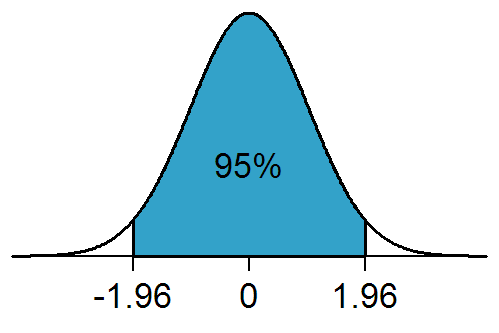

In [167]:
exp(confint.default(glmModel)) 

,2.5 %,97.5 %
(Intercept),4.448182e+01,2.920949e+15
cyl,1.993407e-01,1.330229e+01
hp,9.956343e-01,1.072035e+00
wt,3.098272e-08,3.645446e-01


In [168]:
anova(glmModel, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,31,43.229733,NA
cyl,1,9.278395,30,33.951339,2.318726e-03
hp,1,5.325918,29,28.625421,2.101054e-02
wt,1,18.783929,28,9.841492,1.463955e-05


In [139]:
?qchisq

In [153]:
qchisq(.95, 29)

[1] 42.55697

In [154]:
#  VS. will incresase by exp(-0.03443) for evey
# if disp increase by one  inch3, then the odds of having. Vs=1 wil increase by 96.6%
exp(-0.03443)

[1] 0.966156

In [155]:
1-pchisq(42.86, 31)

[1] 0.07628251

In [156]:
1-pchisq(21.40, 29)

[1] 0.8441651

In [157]:
# https://youtu.be/xl5dZo_BSJk?t=301
1-pchisq(43.86-21.40, 2)

[1] 1.327006e-05

We see from the estimates of the coefficients that weight influences vs positively, while displacement has a slightly negative effect.

The model output is somewhat different from that of an ordinary least squares model. 
I will explain the output in more detail in the next article, but for now, let’s continue 
with our calculations.

Remember, our goal here is to calculate a predicted probability of a V engine, 
for specific values of the predictors: a weight of 2100 lbs and engine displacement of 180 cubic inches.

In [180]:
 #cyl + hp + wt
 range(mtcars$hp)

[1] 0 1

In [178]:
#To do that, we create a data frame called newdata,   
#in which we include the desired values for our prediction.
newdata = data.frame(wt = 2.1, hp = 180, cyl=6)

In [179]:
#Now we use the predict() function to calculate the predicted probability. We include the argument 
#type=”response” in order to get our prediction.
predict(glmModel, newdata, type="response")
# The predicted probability is 0.24.

1 
0.9999068

Fisher Scoring

What about the Fisher scoring algorithm? Fisher’s scoring algorithm is a derivative of Newton’s method for solving maximum likelihood problems numerically.

For model1 we see that Fisher’s Scoring Algorithm needed six iterations to perform the fit.

This doesn’t really tell you a lot that you need to know, other than the fact that the model did indeed converge, and had no trouble doing it.

How well our model fits depends on the difference between the model and the observed data.  One approach for binary data is to implement a Hosmer Lemeshow goodness of fit test.

In [20]:
install.packages("ResourceSelection")

also installing the dependency ‘pbapply’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [21]:
library(ResourceSelection)

ResourceSelection 0.3-4 	 2019-01-08


In [29]:
hoslem.test(mtcars$vs, fitted(model))


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  mtcars$vs, fitted(model)
X-squared = 6.4717, df = 8, p-value = 0.5945


In [30]:
range(mtcars$wt)

[1] 1.513 5.424

In [31]:
xweight <- seq(0, 6, 0.01)

In [32]:
yweight <- predict(model, list(wt = xweight),type="response")

ERROR: Error in eval(predvars, data, env): object 'disp' not found


In [1]:
getwd()

[1] "/Users/medamin/Projets/DataScience"

In [5]:
df<-  read.delim("Labs/LinearRegression/LungCapData.txt", header=TRUE)

In [16]:
attach(df)

The following objects are masked from df (pos = 3):

    Age, Caesarean, Gender, Height, LungCap, Smoke



In [17]:
names(df)

[1] "LungCap"   "Age"       "Height"    "Smoke"     "Gender"    "Caesarean"

In [18]:
class(Age)

[1] "integer"

In [19]:
class(LungCap)

[1] "numeric"

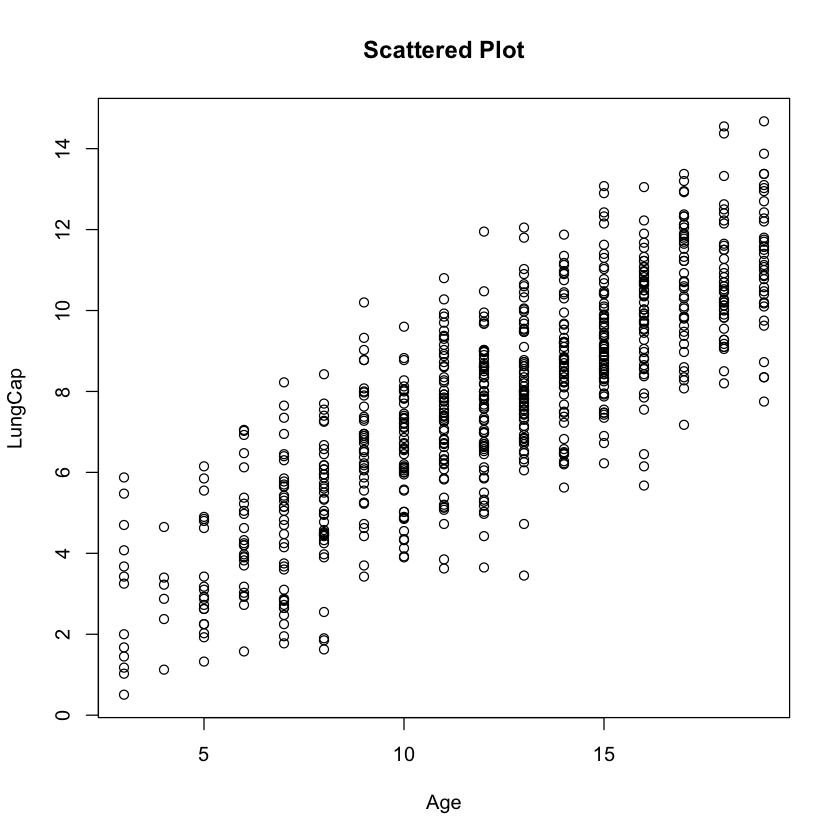

In [20]:
plot(Age, LungCap, main="Scattered Plot")

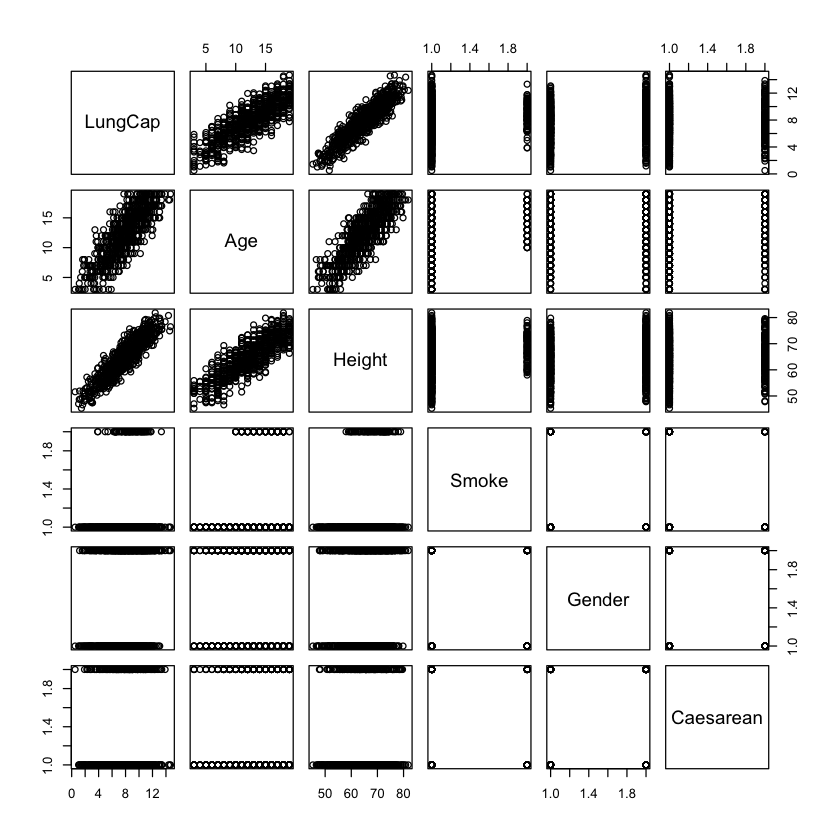

In [21]:
plot(df)

In [22]:
cor(Age, LungCap)

[1] 0.8196749

In [23]:
mod<- lm(LungCap ~ Age)

In [25]:
summary(mod)


Call:
lm(formula = LungCap ~ Age)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7799 -1.0203 -0.0005  0.9789  4.2650 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.14686    0.18353   6.249 7.06e-10 ***
Age          0.54485    0.01416  38.476  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.526 on 723 degrees of freedom
Multiple R-squared:  0.6719,	Adjusted R-squared:  0.6714 
F-statistic:  1480 on 1 and 723 DF,  p-value: < 2.2e-16


In [26]:
attributes(mod)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

In [27]:
mod$coefficients

(Intercept)         Age 
  1.1468578   0.5448484

In [29]:
coef(mod)

(Intercept)         Age 
  1.1468578   0.5448484

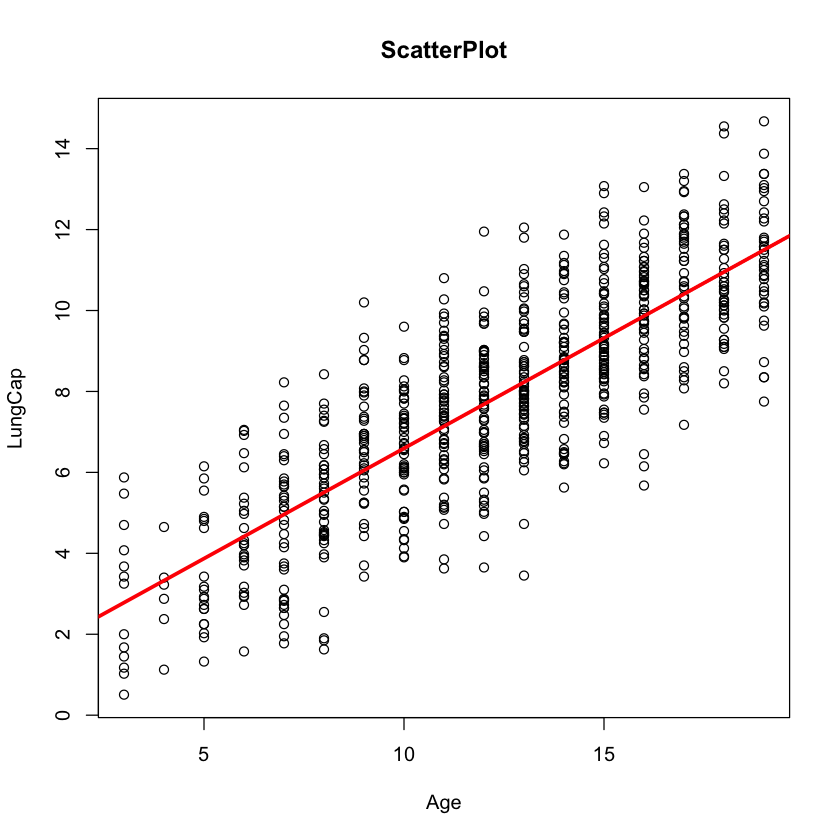

In [31]:
plot(Age, LungCap, main="ScatterPlot")
abline(mod, col=2, lwd=3)

In [32]:
confint(mod)

,2.5 %,97.5 %
(Intercept),0.7865454,1.5071702
Age,0.5170471,0.5726497


In [33]:
confint(mod, level=0.99)

,0.5 %,99.5 %
(Intercept),0.6728686,1.6208470
Age,0.5082759,0.5814209


In [34]:
summary(mod)


Call:
lm(formula = LungCap ~ Age)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7799 -1.0203 -0.0005  0.9789  4.2650 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.14686    0.18353   6.249 7.06e-10 ***
Age          0.54485    0.01416  38.476  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.526 on 723 degrees of freedom
Multiple R-squared:  0.6719,	Adjusted R-squared:  0.6714 
F-statistic:  1480 on 1 and 723 DF,  p-value: < 2.2e-16


In [35]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,3446.995,3446.994814,1480.374,4.077172e-177
Residuals,723,1683.478,2.328461,NA,NA


In [36]:
sqrt(2.3)

[1] 1.516575

In [43]:
library(MASS)
data(survey)

In [44]:
head(survey)

Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


In [47]:
(lm1<- lm(Height ~ Wr.Hnd, survey))


Call:
lm(formula = Height ~ Wr.Hnd, data = survey)

Coefficients:
(Intercept)       Wr.Hnd  
    113.954        3.117  


In [50]:
confint(lm1, level=.99)

,0.5 %,99.5 %
(Intercept),99.805876,128.101371
Wr.Hnd,2.365815,3.867418


The Graph above does not tell wether the company will be profitable (Yes or No), it states that with the increase un funding, the profit also increases. and here comes the logistic regression usefulness with two new levels of outcomes of the probability of Profit .
![Tux, the Linux mascot](imgs/Logistic-Function.png)

linear regresison : 

<img src="https://latex.codecogs.com/svg.latex?\Large&space;y=b_{0}+b_{i}x"  />

We can not use linear equation for binary prediction.

For the Logistic regression we have the following equaiton :

<img src="https://latex.codecogs.com/svg.latex?\Large&space;p=\frac{1}{1+e^{-y}}" />
whith means that :
<img src="https://latex.codecogs.com/svg.latex?\Large&space;ln(\frac{p}{1-p})=b_{0}+b_{i}x" />



#  Steps for Datascience Problem solving 
- Define the problem 
- load the libraries
- Aquire thr Data
- Ingest the Data
- Set the working directory 
- Explore the Data
- Munge hte Data ( if necessary)
- Prepare teh Data
- Scale the Data (if Necessary ) 
- Split the Data into train and test sets
- train the model using the training data
- Run the test data thoughthe model 
- Validate the mdoel - accuracy , precission , recall, confusion matrix ...etc.

In [9]:
getwd()

[1] "/Users/medamin/Projets/DataScience"

In [41]:
# ingest the data
df <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
 str(df)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [42]:
summary(df)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [43]:
# The Graduate Record Examination GRE
# Grade Point Average
head(df)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [44]:
#we use sapply to apply the sd function to each variable in the dataset.
sapply(df, sd)

admit         gre         gpa        rank 
  0.4660867 115.5165364   0.3805668   0.9444602

In [45]:
## two-way contingency table of categorical outcome and predictors we want
## to make sure there are not 0 cells
xtabs(~admit + rank, df)

     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12

In [46]:
library(caTools)

In [47]:
split<-sample.split(df, SplitRatio=0.8)
split

[1]  TRUE  TRUE  TRUE FALSE

In [48]:
train<- subset(df, split=="TRUE")
test<- subset(df, split=="FALSE")

In [49]:
df$admit<- as.factor(df$admit)
df$rank<- as.factor(df$rank)


In [50]:
#train the model using the training data
#use the glm , the general linear model function 
# Dependant variable is admit, independant variables are gpa and rank 
# the family argument shoudl be binomial to indicate logistic regression 
myModal <- glm(admit ~ gpa +rank , train, family="binomial")
summary(myModal)


Call:
glm(formula = admit ~ gpa + rank, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4716  -0.9290  -0.6479   1.1629   2.1067  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.6840     1.2489  -2.149   0.0316 *  
gpa           0.9872     0.3517   2.807   0.0050 ** 
rank         -0.5954     0.1443  -4.127 3.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 380.51  on 299  degrees of freedom
Residual deviance: 352.84  on 297  degrees of freedom
AIC: 358.84

Number of Fisher Scoring iterations: 3


In [ ]:
(-0.6479 -)

In [51]:
# Run the test Data through the modal  
res<- predict(myModal, test, type="response")
res

4          8         12         16         20         24         28 
0.12825836 0.30274741 0.47485861 0.25459411 0.61816921 0.12825836 0.20205521 
        32         36         40         44         48         52         56 
0.23810366 0.29653262 0.13889314 0.23101453 0.10587129 0.12178042 0.37251591 
        60         64         68         72         76         80         84 
0.09264975 0.33860538 0.49458116 0.10128893 0.37251591 0.66135726 0.10039383 
        88         92         96        100        104        108        112 
0.39188927 0.57785262 0.35721915 0.23101453 0.35877861 0.31326693 0.15456100 
       116        120        124        128        132        136        140 
0.37021132 0.16972310 0.17823372 0.20205521 0.24591288 0.27970504 0.56334128 
       144        148        152        156        160        164        168 
0.24717328 0.14247322 0.36863073 0.09602309 0.33200501 0.23509512 0.32115051 
       172        176        180        184        188        192        196 
0.15496477 0.36633615 0.18261279 0.47901395 0.26275765 0.27377754 0.41804889 
       200        204        208        212        216        220        224 
0.20687221 0.23222208 0.57544268 0.29039228 0.16833653 0.41804889 0.26025512 
       228        232        236        240        244        248        252 
0.11063545 0.22579541 0.29653262 0.25647207 0.33268991 0.32182381 0.13048210 
       256        260        264        268        272        276        280 
0.23810366 0.47162829 0.36105283 0.29383663 0.23454052 0.28232322 0.31539456 
       284        288        292        296        300        304        308 
0.11864837 0.19576358 0.24408685 0.22066037 0.24717328 0.51354953 0.39896911 
       312        316        320        324        328        332        336 
0.43737711 0.25518033 0.48964654 0.22806875 0.39188927 0.28370003 0.59461258 
       340        344        348        352        356        360        364 
0.26025512 0.29859601 0.46916900 0.25272523 0.37627402 0.35877861 0.38252022 
       368        372        376        380        384        388        392 
0.29179244 0.31900215 0.16516447 0.22981137 0.66135726 0.36404761 0.48887523 
       396        400 
0.51848032 0.34750415

In [52]:
res<- predict(myModal, train, type="response")
res

1          2          3          5          6          7          9 
0.28772928 0.30001901 0.66135726 0.10219109 0.28634073 0.41639910 0.24534094 
        10         11         13         14         15         17         18 
0.49874518 0.24659937 0.66135726 0.30274741 0.66135726 0.22353818 0.12532138 
        19         21         22         23         25         26         27 
0.45689736 0.20737912 0.42768540 0.09264975 0.36176521 0.58266130 0.57061212 
        29         30         31         33         34         35         37 
0.33268991 0.49211366 0.20849662 0.24717328 0.37251591 0.45521418 0.48224869 
        38         39         41         42         43         45         46 
0.16695901 0.31326693 0.18455499 0.35495566 0.31752996 0.27439167 0.25647207 
        47         49         50         51         53         54         55 
0.38719431 0.06803057 0.23810366 0.34081970 0.14947123 0.34373694 0.23631745 
        57         58         59         61         62         63         65 
0.21064318 0.17252348 0.43252480 0.32398214 0.14330420 0.30001901 0.37251591 
        66         67         69         70         71         73         74 
0.41804889 0.18362775 0.58984467 0.59936270 0.37251591 0.15199863 0.51848032 
        75         77         78         79         81         82         83 
0.15979152 0.23989913 0.37251591 0.45032237 0.09950578 0.30066763 0.23156332 
        85         86         87         89         90         91         93 
0.28571039 0.28232322 0.35495566 0.48964654 0.51848032 0.47655089 0.49380961 
        94         95         97         98         99        101        102 
0.27243057 0.38252022 0.16928858 0.41325351 0.26275765 0.20415255 0.27970504 
       103        105        106        107        109        110        111 
0.14452041 0.50614871 0.28032733 0.55847868 0.17111874 0.38485461 0.11659926 
       113        114        115        117        118        119        121 
0.18114389 0.47485861 0.33639812 0.38485461 0.44955845 0.59223079 0.45444881 
       122        123        125        126        127        129        130 
0.22461150 0.16020636 0.34526916 0.15073057 0.55360484 0.32614798 0.12390781 
       131        133        134        135        137        138        139 
0.32182381 0.37323769 0.19315440 0.27636152 0.14452041 0.37251591 0.37323769 
       141        142        143        145        146        147        149 
0.50121312 0.16928858 0.23576085 0.15327543 0.25272523 0.37323769 0.39970950 
       150        151        153        154        155        157        158 
0.49704893 0.60173084 0.50368100 0.25835909 0.30418161 0.19987614 0.56334128 
       159        161        162        163        165        166        167 
0.39424433 0.31326693 0.39660431 0.41086191 0.35044819 0.66135726 0.13387908 
       169        170        171        173        174        175        177 
0.37251591 0.28975664 0.26792893 0.26216015 0.38019124 0.17068139 0.21613208 
       178        179        181        182        183        185        186 
0.21728382 0.23454052 0.32330648 0.22525629 0.51848032 0.09018997 0.42045246 
       187        189        190        191        193        194        195 
0.28772928 0.30066763 0.36176521 0.27439167 0.31900215 0.17922969 0.38953923 
       197        198        199        201        202        203        205 
0.19162058 0.13273853 0.29179244 0.23101453 0.32832127 0.66135726 0.63662812 
       206        207        209        210        211        213        214 
0.32764094 0.55360484 0.20576115 0.39660431 0.14574519 0.26084981 0.24351779 
       215        217        218        219        221        222        223 
0.41086191 0.39734321 0.57785262 0.41639910 0.22579541 0.37021132 0.42602543 
       225        226        227        229        230        231        233 
0.26660017 0.26599709 0.41564920 0.38019124 0.37786777 0.13970665 0.36863073 
       234        235        237        238        239        241        242 
0.13771666 0.55116399 0.3942443

## Using the logit model

In [53]:
df$rank <- factor(df$rank)
mylogit <- glm(admit ~ gre + gpa + rank, df, family = "binomial")

In [54]:
#Since we gave our model a name (mylogit), R will not produce any output from our regression. 
#In order to get the results we use the summary command:
summary(mylogit)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


- In the output above, the first thing we see is the call, this is R reminding us what the model we ran was, what options we specified, etc.
Next we see the deviance residuals, which are a measure of model fit. This part of output shows the distribution of the deviance residuals for individual cases used in the model. Below we discuss how to use summaries of the deviance statistic to assess model fit.
- The next part of the output shows the coefficients, their standard errors, the z-statistic (sometimes called a Wald z-statistic), and the associated p-values. Both gre and gpa are statistically significant, as are the three terms for rank. The logistic regression coefficients give the change in the log odds of the outcome for a one unit increase in the predictor variable.
- For every one unit change in gre, the log odds of admission (versus non-admission) increases by 0.002.
- For a one unit increase in gpa, the log odds of being admitted to graduate school increases by 0.804.
- The indicator variables for rank have a slightly different interpretation. For example, having attended an undergraduate institution with rank of 2, versus an institution with a rank of 1, changes the log odds of admission by -0.675.
- Below the table of coefficients are fit indices, including the null and deviance residuals and the AIC. Later we show an example of how you can use these values to help assess model fit.

In [55]:
## CIs using profiled log-likelihood
confint(mylogit)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-6.2716202334,-1.792547080
gre,0.0001375921,0.004435874
gpa,0.1602959439,1.464142727
rank2,-1.3008888002,-0.056745722
rank3,-2.0276713127,-0.670372346
rank4,-2.4000265384,-0.753542605


In [60]:
## CIs using standard errors
confint.default(mylogit)

,2.5 %,97.5 %
(Intercept),-6.2242418514,-1.755716295
gre,0.0001202298,0.004408622
gpa,0.1536836760,1.454391423
rank2,-1.2957512650,-0.055134591
rank3,-2.0169920597,-0.663415773
rank4,-2.3703986294,-0.732528724


In [61]:
# wald.test function refers to the coefficients by their order in the model. We use the wald.test function.
# b supplies the coefficients, while Sigma supplies the variance covariance matrix of the error terms, 
#finally Terms tells R which terms in the model are to be tested, in this case, terms 4, 5, and 6, 
# are the three terms for the levels of rank.
wald.test(b = coef(mylogit), Sigma = vcov(mylogit), Terms = 4:6)

Wald test:
----------

Chi-squared test:
X2 = 20.9, df = 3, P(> X2) = 0.00011

- The chi-squared test statistic of 20.9, with three degrees of freedom is associated with a p-value of 0.00011 indicating that the overall effect of rank is statistically significant.

In [56]:
#load library  
install.packages("caTools")
library(caTools)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [57]:
#split the data 
split<- sample.split(df, SplitRatio = 0.8)
split

[1]  TRUE  TRUE FALSE  TRUE

In [58]:
train<- subset(df, split=="TRUE")
test<- subset(df, split=="FALSE")

In [59]:
# Munge the Data
# these are ctegorical variables so lets tell R to convert them to factors
df$admit <- as.factor(df$admit)
df$rank  <- as.factor(df$rank)

In [60]:
# train the model using the training data
# use gml, the general linear model function 
# Dependant variable is admit independant variables are gpa and rank
# the family argument shoudl be binomial to indicate logistic regression 

model<- glm( admit ~ gpa + rank, data=train, family="binomial")
summary(model)


Call:
glm(formula = admit ~ gpa + rank, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3911  -0.8609  -0.6682   1.1715   2.1192  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -4.0376     1.2874  -3.136  0.00171 **
gpa           1.1318     0.3575   3.166  0.00155 **
rank2        -0.4763     0.3782  -1.259  0.20790   
rank3        -1.0951     0.3973  -2.757  0.00584 **
rank4        -1.1051     0.4942  -2.236  0.02536 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 364.81  on 299  degrees of freedom
Residual deviance: 343.04  on 295  degrees of freedom
AIC: 353.04

Number of Fisher Scoring iterations: 4


In [61]:
# run de test data through the model 
res<- predict(model , test, type="response")
res

3         7        11        15        19        23        27        31 
0.6199822 0.3396302 0.3507855 0.6199822 0.4329541 0.1244347 0.5120174 0.2963834 
       35        39        43        47        51        55        59        63 
0.3813416 0.2745793 0.2791109 0.3547958 0.3177525 0.2054382 0.4054068 0.2730589 
       67        71        75        79        83        87        91        95 
0.2600585 0.3530474 0.2247726 0.3760159 0.1904854 0.3194124 0.4553031 0.3496313 
       99       103       107       111       115       119       123       127 
0.2219296 0.2019936 0.4978725 0.1601886 0.3128658 0.5374147 0.1292938 0.4922142 
      131       135       139       143       147       151       155       159 
0.2836880 0.2359106 0.3394085 0.3354817 0.3394085 0.5486481 0.2775750 0.3626060 
      163       167       171       175       179       183       187       191 
0.3811083 0.1860716 0.2386232 0.2409415 0.2035970 0.5032841 0.2597891 0.2338765 
      195       199       203       207       211       215       219       223 
0.3573908 0.2641656 0.6199822 0.4922142 0.2038241 0.3811083 0.3396302 0.3498562 
      227       231       235       239       243       247       251       255 
0.3864615 0.1947946 0.4893857 0.1294515 0.1439674 0.3243531 0.1983695 0.2388777 
      259       263       267       271       275       279       283       287 
0.3678537 0.1791066 0.1860716 0.4891386 0.2723307 0.1483795 0.2247726 0.4029195 
      291       295       299       303       307       311       315       319 
0.3522092 0.2401956 0.3652259 0.2791109 0.3893835 0.3530474 0.2267509 0.2801325 
      323       327       331       335       339       343       347       351 
0.1498153 0.3169571 0.3530474 0.2663714 0.3974861 0.3380095 0.3268382 0.5032841 
      355       359       363       367       371       375       379       383 
0.4413081 0.2775750 0.2768394 0.1398333 0.4385195 0.4413081 0.1677530 0.3678537 
      387       391       395       399 
0.4637356 0.2569171 0.3504667 0.4054068

In [62]:
res<- predict(model , train, type="response")
res

1          2          4          5          6          8          9 
0.25978915 0.27305889 0.17765307 0.13864470 0.24626306 0.26345248 0.21482949 
        10         12         13         14         16         17         18 
0.48065820 0.40291947 0.61998224 0.26345248 0.22452873 0.31805610 0.09661338 
        20         21         22         24         25         26         28 
0.56818130 0.17580267 0.39996236 0.17765307 0.32683825 0.52614308 0.28703033 
        29         30         32         33         34         36         37 
0.29532680 0.42211656 0.20729184 0.21674471 0.35304741 0.25691710 0.41111404 
        38         40         41         42         44         45         46 
0.13579914 0.10913378 0.14491230 0.31941237 0.19995132 0.23387655 0.22650547 
        48         49         50         52         53         54         56 
0.14414006 0.08819359 0.20729184 0.16794855 0.20938947 0.30723825 0.35304741 
        57         58         60         61         62         64         65 
0.17910658 0.14120020 0.12443474 0.28599354 0.20017541 0.31530402 0.35304741 
        66         68         69         70         72         73         74 
0.38914844 0.42487976 0.53459990 0.54584397 0.13729863 0.21316134 0.50328409 
        76         77         78         80         81         82         84 
0.35304741 0.20915777 0.35304741 0.61998224 0.13463944 0.26126220 0.13596355 
        85         86         88         89         90         92         93 
0.25761867 0.24208566 0.35999430 0.41935822 0.50328409 0.52049655 0.47501048 
        94         96         97         98        100        101        102 
0.23185476 0.32187773 0.23887767 0.38378138 0.19995132 0.17254689 0.25117866 
       104        105        106        108        109        110        112 
0.33769625 0.48913860 0.24001514 0.27457928 0.13983333 0.35220925 0.21698251 
       113        114        116        117        118        120        121 
0.14963708 0.40291947 0.35046669 0.35220925 0.42463815 0.13847757 0.43017770 
       122        124        125        126        128        129        130 
0.18360218 0.14677958 0.32267967 0.21126925 0.28703033 0.28831023 0.17113551 
       132        133        134        136        137        138        140 
0.20483956 0.33940850 0.16152728 0.25117866 0.20199360 0.35304741 0.50353129 
       141        142        144        145        146        148        149 
0.48348400 0.23887767 0.21674471 0.21506577 0.22256427 0.11247892 0.32209361 
       150        152        153        154        156        157        158 
0.42764767 0.33435196 0.48631086 0.22849449 0.12945151 0.15950746 0.50353129 
       160        161        162        164        165        166        168 
0.30802028 0.27457928 0.36522586 0.19400030 0.31451190 0.61998224 0.29609147 
       169        170        172        173        174        176        177 
0.35304741 0.26197146 0.12428227 0.23250931 0.34706220 0.33183780 0.17527130 
       178        180        181        182        184        185        186 
0.18585964 0.15108294 0.29845577 0.32051593 0.45811136 0.12078242 0.39184216 
       188        189        190        192        193        194        196 
0.22192962 0.26126220 0.32683825 0.24484654 0.29373806 0.25357833 0.38914844 
       197        198        200        201        202        204        205 
0.16000031 0.18436363 0.29402862 0.19995132 0.29063806 0.33045439 0.59024471 
       206        208        209        210        212        213        214 
0.30321673 0.51767123 0.17416878 0.36522586 0.25048871 0.21998145 0.21292659 
       216        217        218        220        221        222        224 
0.13713286 0.31962737 0.52049655 0.38914844 0.19457506 0.35046669 0.23049578 
       225        226        228        229        230        232        233 
0.22586285 0.23657303 0.15126261 0.34706220 0.34450193 0.19457506 0.33435196 
       234        236        237        238        240        241        242 
0.10803828 0.25691710 0.3626060

In [63]:
# validate the model - cofusion Matrix 
confusionMatrix<- table(Actual_value=train$admit, Predicted_value= res>0.5)
confusionMatrix

            Predicted_value
Actual_value FALSE TRUE
           0   201   10
           1    72   17

In [64]:
summary(confusionMatrix)

Number of cases in table: 300 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 15.765, df = 1, p-value = 7.173e-05

In [26]:
# Accuracy 
(confusionMatrix[1,1]+ confusionMatrix[2,2])/sum(confusionMatrix)

[1] 0.7333333

# Two-way class decision tree

In [27]:
#load package 
install.packages("FSelector")
install.packages("rpart")
install.packages("caret", dependencies=TRUE)
install.packages("dplyr")
install.packages("rpart.plot")
install.packages("xlsx")
install.packages("data.free")
install.packages("caTools")

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘RWeka’

Warning message in install.packages("FSelector"):
“installation of package ‘rJava’ had non-zero exit status”Warning message in install.packages("FSelector"):
“installation of package ‘RWekajars’ had non-zero exit status”Warning message in install.packages("FSelector"):
“installation of package ‘RWeka’ had non-zero exit status”Warning message in install.packages("FSelector"):
“installation of package ‘FSelector’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘httpuv’, ‘nloptr’, ‘shiny’, ‘miniUI’, ‘classInt’, ‘labelled’, ‘gplots’, ‘multcomp’, ‘lme4’, ‘prodlim’, ‘questionr’, ‘ROCR’, ‘strucchange’, ‘coin’, ‘recipes’, ‘BradleyTerry2’, ‘e1071’, ‘earth’, ‘gam’, ‘ipred’, ‘klaR’, ‘MLmetrics’, ‘party’, ‘Cubist’

Warning message in install.packages("caret", dependencies

In [2]:
library(rpart)
library(caret)
library(dplyr)
library(rpart.plot)
library(caTools)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
getwd()

[1] "/Users/medamin/Projets/DataScience"

In [19]:
list.files()

[1] "9781788295864_Code"         "AirlineDelay"              
 [3] "Airline_Data.R"             "DOT_ONTIME.csv"            
 [5] "Data Science with |R.ipynb" "FuelConsumption"           
 [7] "Introduction.ipynb"         "Lab_1.ipynb"               
 [9] "R programming Lab_1.ipynb"  "Twitter Data.R"            
[11] "Uber"                       "Uber_Lab.ipynb"            
[13] "a.R"                        "b.R"                       
[15] "c.R"                        "d.R"                       
[17] "imgs"                       "longintro.pdf"             
[19] "r-data-science"             "r-programming-fundamentals"
[21] "test.r"                     "titanic.csv"               
[23] "tweets.csv"

In [5]:
titanic<- read.csv("titanic.csv", header=T, sep=",")

In [6]:
head(titanic)

Survived,Pclass,Name,Sex,Age,Siblings.Spouses.Aboard,Parents.Children.Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
0,3,Mr. William Henry Allen,male,35,0,0,8.0500
0,3,Mr. James Moran,male,27,0,0,8.4583


In [7]:
names(titanic)

[1] "Survived"                "Pclass"                 
[3] "Name"                    "Sex"                    
[5] "Age"                     "Siblings.Spouses.Aboard"
[7] "Parents.Children.Aboard" "Fare"

In [6]:
install.packages("dplyr")
library(dplyr)
mutate(titanic, f=Fare*1.1)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in mutate(titanic, f = Fare * 1.1): object 'titanic' not found


In [ ]:
head(titanic)

In [37]:
df<- select(titanic, Survived, Pclass,Sex, Age)

In [1]:
df<- mutate(df, survived=factor(Survived), class=as.numeric(Pclass), age=as.numeric(Age))

ERROR: Error in mutate(df, survived = factor(Survived), class = as.numeric(Pclass), : could not find function "mutate"


In [27]:
library(MASS)
data(package="MASS")
boston<-Boston
dim(boston)
names(boston)

[1] 506  14

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [28]:
require(randomForest)

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [29]:
set.seed(101)
train = sample(1:nrow(boston), 300)

In [30]:
rf.boston = randomForest(medv~., data = boston, subset = train)
rf.boston


Call:
 randomForest(formula = medv ~ ., data = boston, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 12.30718
                    % Var explained: 85.13

In [31]:
oob.err = double(13)
test.err = double(13)
for(mtry in 1:13){
  fit = randomForest(medv~., data = boston, subset=train, mtry=mtry, ntree = 350)
  oob.err[mtry] = fit$mse[350]
  pred = predict(fit, boston[-train,])
  test.err[mtry] = with(boston[-train,], mean( (medv-pred)^2 ))
}

###  What Is A Decision Tree Algorithm
![Tux, the Linux mascot](imgs/decision_tree_Agorithm.png)


###  Entropy measures the impurity or uncertainty present in the data. It is used to decide how a Decision Tree can split the data.
![Tux, the Linux mascot](imgs/Entropy.png)


![Tux, the Linux mascot](imgs/Information_Gain.png)


In [25]:
dt<-as.Date('April 26, 2001',format='%B %d, %Y')
dt

[1] "2001-04-26"

In [53]:
dt<-as.Date('01-May-19',format='%d-%b-%y')
dt

[1] "2019-05-01"

In [56]:
month2 <- c("Jan","Dec","Jan","Mar","Apr")
year2 <- c(1998,1998,1999,1999,1999)
day2 <- c(4,10,3,16,25)
date.df6 <- paste(year2,month2,day2,sep="-")
date.df6

[1] "1998-Jan-4"  "1998-Dec-10" "1999-Jan-3"  "1999-Mar-16" "1999-Apr-25"

In [15]:
df<- read.csv("df.csv", header=T)

In [16]:
tail(df)

,ID,IP_Address,Secceed_Count,Failed_Count,Consecutive_Failed_Count,Max_Consecutive_Failed_Count,Max_Consecutive_Failed_Time,Failed_Percentage,Last_Ping_Status,Last_Ping_Time,Last_Ping_TTL,Average_Ping_Time,Description,Last_Secceed_on,Last_Failed_on,Minimum_Ping_Time,Maximum_Ping_Time,Order,date
65529,178767,10.129.84.66,9270,1067,8,1017,5/6/2019 7:07:27 AM,10.32%,Succeeded,1,248,1,?????? ?????????? ??????,5/7/2019 11:51:51 PM,5/7/2019 2:57:59 PM,NA,1,24,08-May-19
65530,175784,10.129.84.65,9111,1049,7,1031,5/6/2019 7:07:27 AM,10.32%,Succeeded,2,248,1,?????? ?????????? ??????,5/7/2019 8:51:55 PM,5/7/2019 2:56:58 PM,NA,1,24,07-May-19
65531,149752,10.19.10.3,7736,890,1,8,5/6/2019 6:06:27 AM,10.32%,Succeeded,1,248,17,?????? ?????? ???????? ??????,5/6/2019 6:52:07 PM,5/6/2019 6:51:06 PM,NA,1,69,06-May-19
65532,125962,10.27.25.35,6466,744,1,701,5/5/2019 6:06:17 AM,10.32%,Succeeded,1,57,2,???? ????? ??????? ? ???????,5/5/2019 6:52:06 PM,5/5/2019 1:02:14 PM,NA,1,70,05-May-19
65533,123982,10.27.15.7,6360,732,1,699,5/5/2019 6:04:15 AM,10.32%,Succeeded,1,248,2,????? ??????? ?? ???? ?? ????? ???????? ???????? ??????,5/5/2019 4:51:59 PM,5/5/2019 12:33:46 PM,NA,1,70,05-May-19
65534,278471,10.34.10.3,14589,1677,1,8,5/4/2019 8:30:17 AM,10.31%,Succeeded,1,248,1,????? ???????? ??????,5/12/2019 4:22:07 AM,5/9/2019 11:53:18 AM,NA,0,10,12-May-19


In [17]:
head(df$date)

[1] 30-Apr-19 06-May-19 06-May-19 06-May-19 06-May-19 06-May-19
13 Levels: 01-May-19 02-May-19 03-May-19 04-May-19 05-May-19 ... 30-Apr-19

In [18]:
typeof(df$date)

[1] "integer"

In [19]:
df$date[1]

[1] 30-Apr-19
13 Levels: 01-May-19 02-May-19 03-May-19 04-May-19 05-May-19 ... 30-Apr-19

In [20]:
as.Date(df$date[1], format="%d-%b-%y")

[1] "2019-04-30"

In [35]:
quiz_scores$scores[quiz_scores$gender=="f"]#to see grades for female students

[1] 25 16 15 23 24 17

In [22]:
library(dplyr)
df<- mutate(df, dd=as.Date(df$date, format="%d-%b-%y"))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [23]:
head(df$dd)

[1] "2019-04-30" "2019-05-06" "2019-05-06" "2019-05-06" "2019-05-06"
[6] "2019-05-06"

In [ ]:
df<-mutate(df, newDate=as.Date(df$data, format="$d-%b-%y"))

ERROR: Error in as.Date.default(df$data, format = "$d-%b-%y"): do not know how to convert 'df$data' to class “Date”


In [54]:
as.Date("22-Jan-19", format="%d-%b-%y")

[1] "2019-01-22"

# Assessment

In [54]:
df2<- data.frame(c("A", "A", "B", "B", "C"),
pop=c(219, 226, 370, 238, 315),
coast=c(0, 1, 0 , 0, 0),
stringsAsFactor=F)
# select  summary, head, print, describe
summary(df2)

 c..A....A....B....B....C..      pop            coast     stringsAsFactor
 A:2                        Min.   :219.0   Min.   :0.0   Mode :logical  
 B:2                        1st Qu.:226.0   1st Qu.:0.0   FALSE:5        
 C:1                        Median :238.0   Median :0.0                  
                            Mean   :273.6   Mean   :0.2                  
                            3rd Qu.:315.0   3rd Qu.:0.0                  
                            Max.   :370.0   Max.   :1.0                  

In [56]:
library(stringr)
x<- c("Friday", "Sunday", "March", "February")
str_detect(x, "day")


[1]  TRUE  TRUE FALSE FALSE

In [57]:
# which class return Logical
x<- FALSE
class(x)
x<- "5.35"
class(x)
x<- -10L
class(x)

[1] "logical"

[1] "character"

[1] "integer"

In [ ]:
install.packages("lubridate")
library(lubridate)
session_df<- daat.frame(

id=1:2,
logout_t=c("July 22, 2010 20:55", "Juky 22, 2010 17:27"),
    stringAsFactors=FALSE
)

session_df$logout_t<- ymd_hms(
sessions_df$logout_t
)
str(sesions_df)

In [15]:
mtcars2 <- subset(mtcars, cyl == 4)
with(mtcars2, sum(vs))
sum(mtcars2$am)
rm(mtcars2) 


[1] 10

[1] 8

cyl,mean
4,26.66364
6,19.74286
8,15.10000


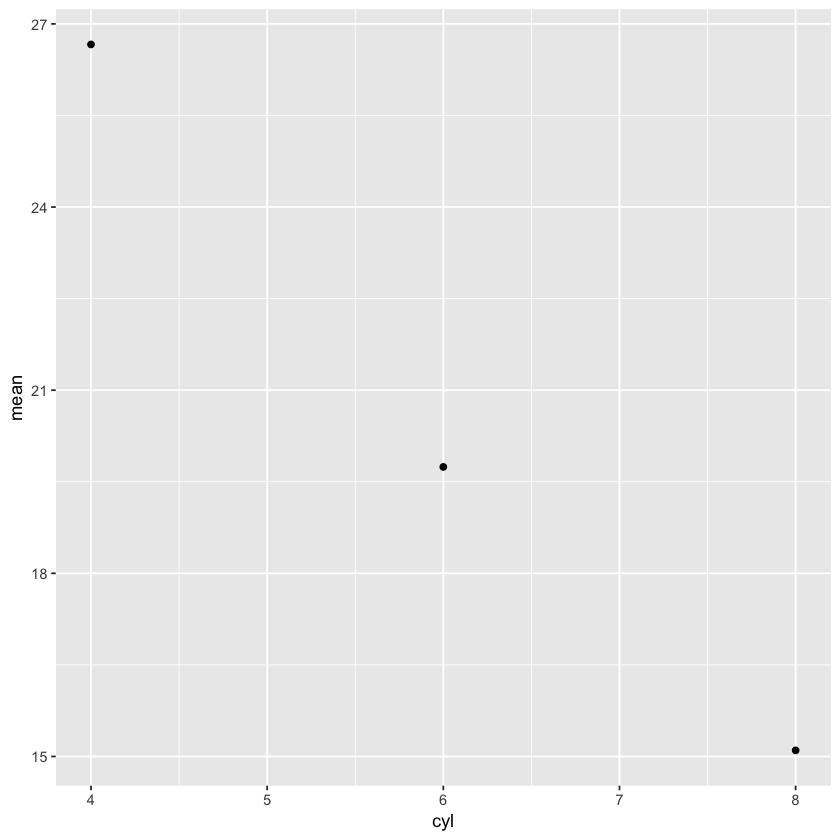

In [287]:
library(dplyr)
library(ggplot2)

(by_cyl <- mtcars %>%
  group_by(cyl) %>%
  summarise(mean = mean(mpg)))

ggplot(by_cyl, aes(cyl, mean)) + geom_point()

In [18]:
install.packages("car")
library(car)

also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘foreign’, ‘openxlsx’, ‘nloptr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’

Warning message in install.packages("car"):
“installation of package ‘zip’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘nloptr’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘openxlsx’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘rio’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(car): there is no package called ‘car’


In [ ]:
dim(UN)

# Clear up

In [25]:

# clean package
detach("package:datasets", unload=TRUE)

ERROR: Error in detach("package:datasets", unload = TRUE): invalid 'name' argument


In [26]:
# clear plots
dev.off()

null device 
          1

In [3]:
df <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
 str(df)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


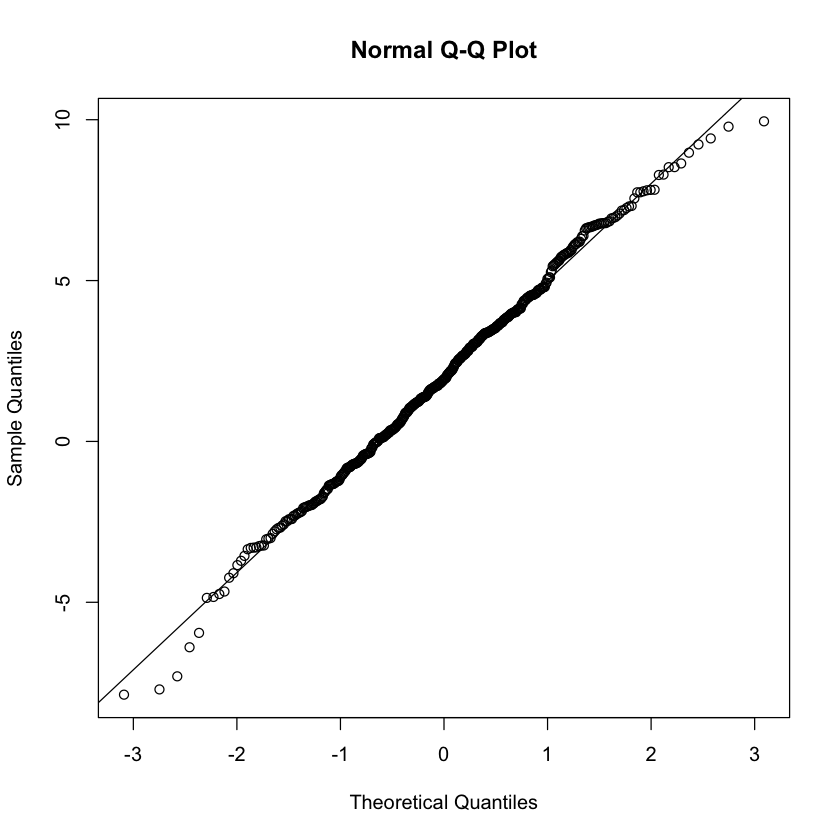

In [1]:
x=rnorm(500,2,3)
qqnorm(x)
qqline(x) #to add normality line

 num [1:100] 4.12 5.85 5.92 2.37 2.28 ...


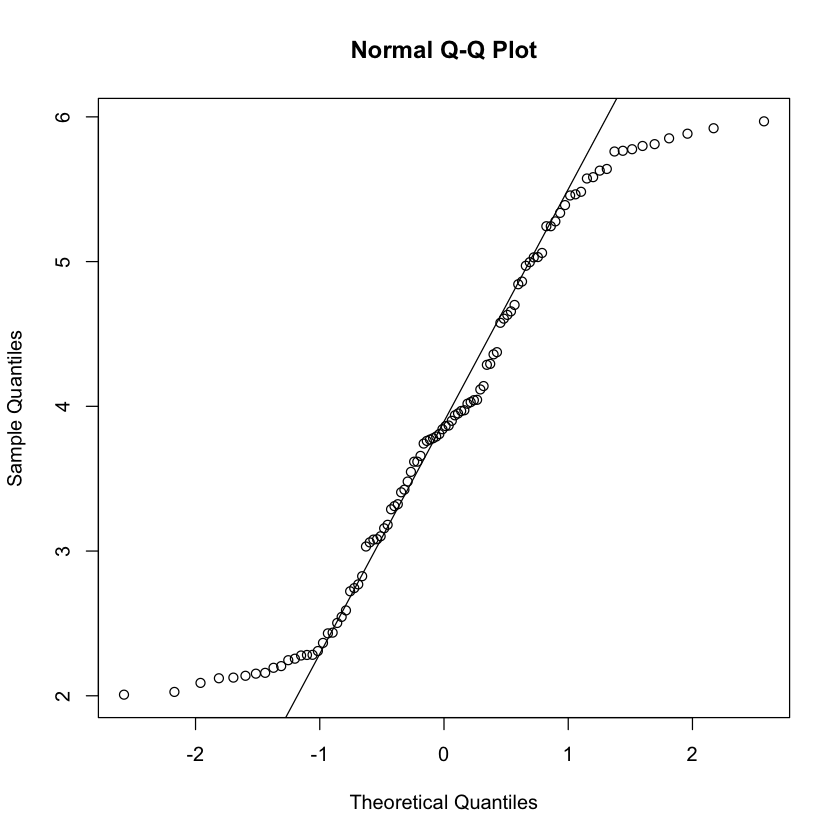

In [68]:
 y=runif(100,2,6)
qqnorm(y) #draw a qq plot
qqline(y)
str(y)

# K-means   1

![](imgs/kmeans_SS.png)

In [ ]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra)

In [ ]:
df <- USArrests
head(df)

In [124]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [127]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [55]:
set.seed(20)
irisCluster <- kmeans(iris[, 1:4], 3)

In [56]:
str(irisCluster)

List of 9
 $ cluster     : int [1:150] 3 3 3 3 3 3 3 3 3 3 ...
 $ centers     : num [1:3, 1:4] 6.85 5.9 5.01 3.07 2.75 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 681
 $ withinss    : num [1:3] 23.9 39.8 15.2
 $ tot.withinss: num 78.9
 $ betweenss   : num 603
 $ size        : int [1:3] 38 62 50
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [57]:
table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0          2        36
  2      0         48        14
  3     50          0         0

In [132]:
library(GGally)

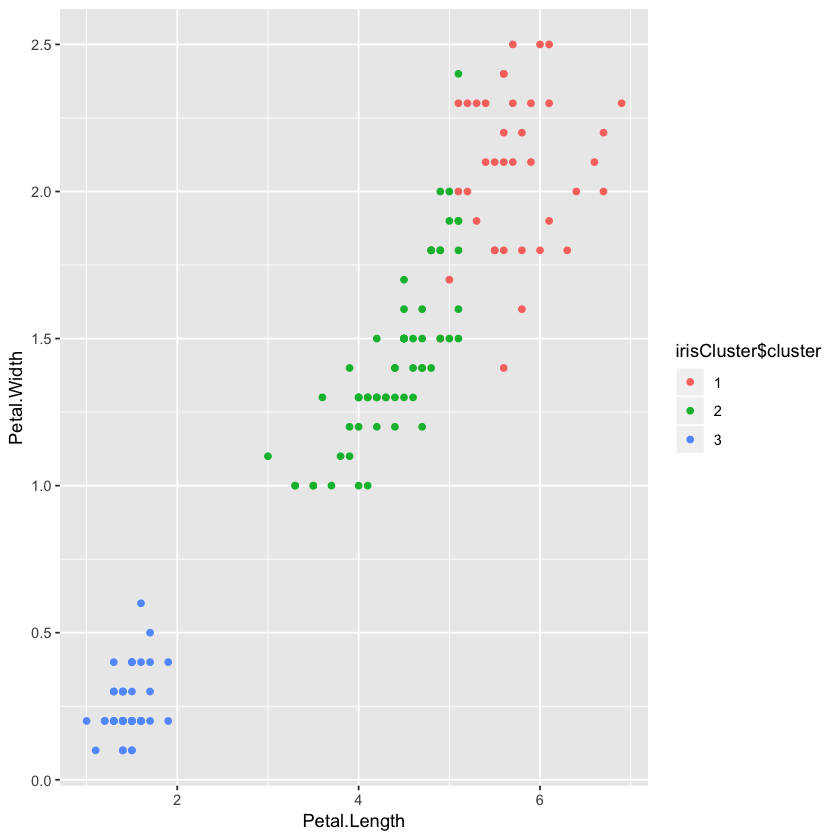

In [133]:
irisCluster$cluster <- as.factor(irisCluster$cluster)
ggplot(iris, aes(Petal.Length, Petal.Width, color = irisCluster$cluster)) + geom_point()

In [58]:
library(cluster)

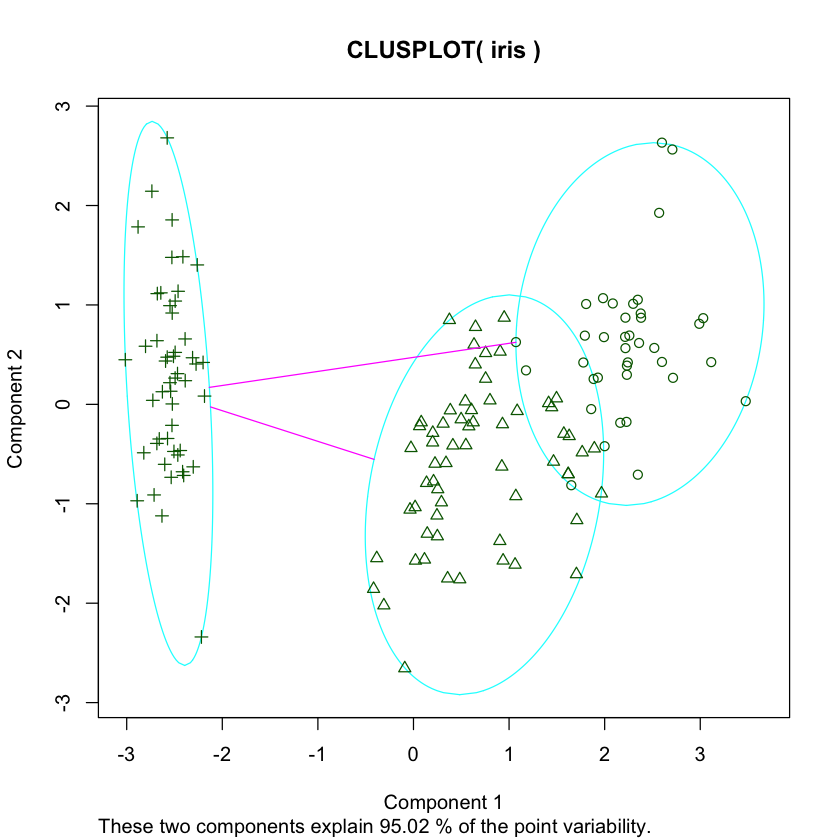

In [63]:
clusplot(iris, irisCluster$cluster)

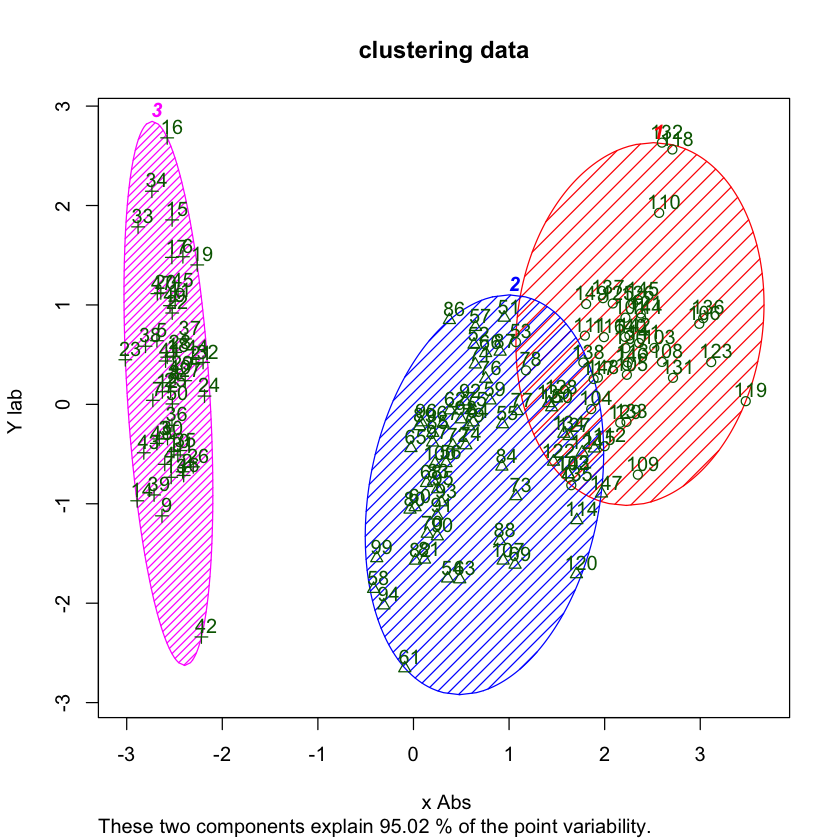

In [64]:
clusplot(iris, irisCluster$cluster, 
    lines=0, 
    shade=T,
    color=T,
    labels=2,
    span=T,
    main=paste("clustering data"),
    xlab=" x Abs",
    ylab="Y lab "
    )

#  K-means. 2
- http://rstudio-pubs-static.s3.amazonaws.com/450733_9a472ce9632f4ffbb2d6175aaaee5be6.html

In [302]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [303]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [304]:
class(iris)

[1] "data.frame"

In [305]:
dim(iris)

[1] 150   5

In [306]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


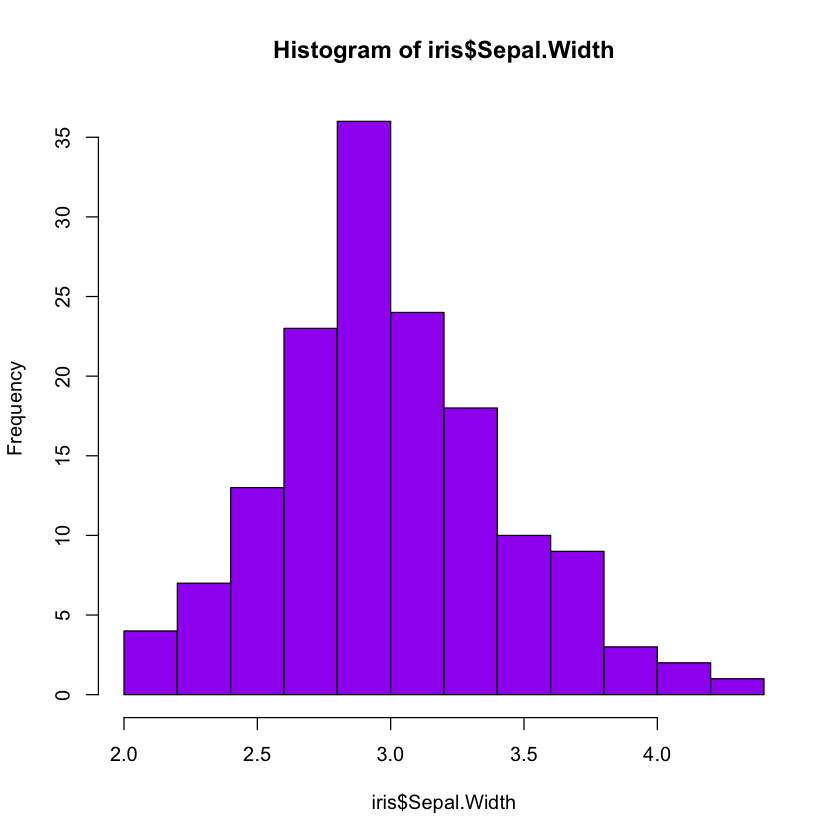

In [310]:
# Plotting Iris
hist(iris$Sepal.Width, col = "purple")

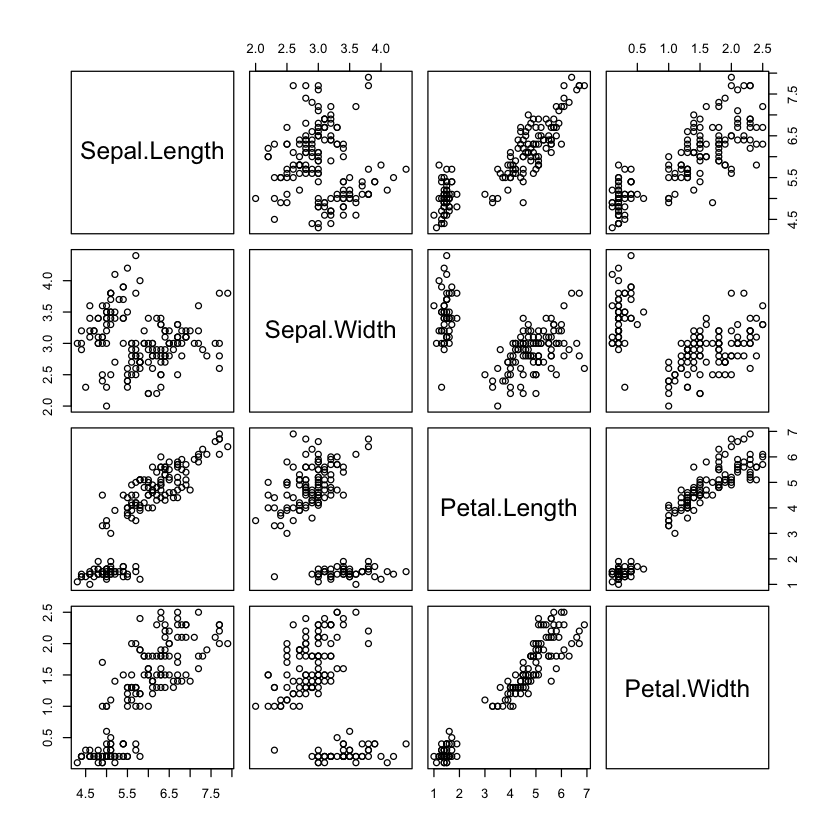

In [312]:
# scatterplot matrix to visualize the data
pairs(iris[, 1:4])

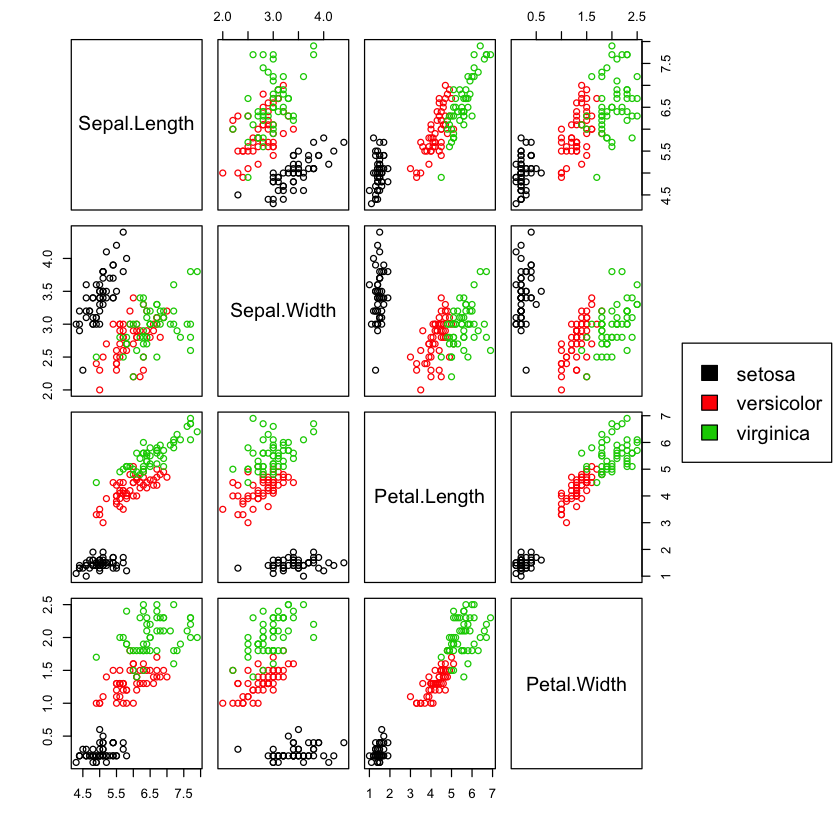

In [331]:
# hard to distinguish what exaxtly we are looking at, so we are going to color it by the class
pairs(iris[,1:4],col=iris[,5],oma=c(4,4,2,12))
par(xpd=TRUE)
legend(0.85,0.6, as.vector(unique(iris$Species)),fill=c(1,2,3))

In [334]:
library(dplyr)
library(ggplot2)
library(corrplot)

corrplot 0.84 loaded


In [337]:
data(iris)
iris2 <- iris

In [338]:
# Now I am wemoving the species by assigning them to NULL.
iris2$Species <- NULL
#now I am making 3 clusters, because I already know for sure there are three species, 
# this would be totally different process if I would not now particular count of clusters
(kmeans.result <- kmeans(iris2, 3))

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [339]:
table(iris$Species, kmeans.result$cluster)

            
              1  2  3
  setosa      0 50  0
  versicolor 48  0  2
  virginica  14  0 36

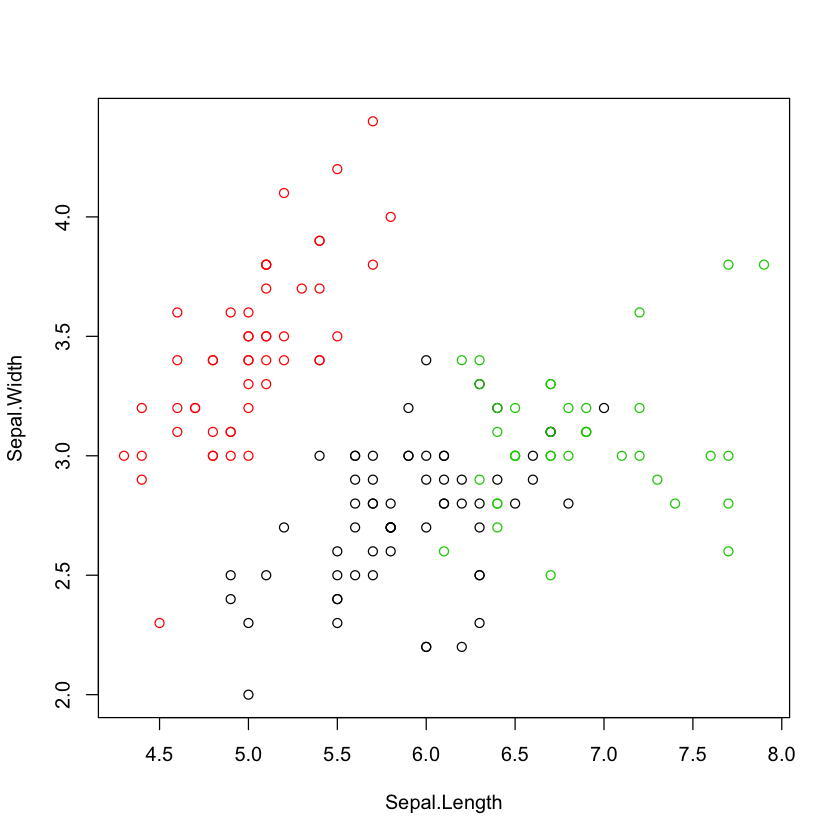

In [344]:
#At last we are plotting the cluster itself
plot(iris2[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster)
#And to distinguish the clusters better, we can plot cluster centers
#For some reason this code is not runing right now, go and figure, but I hope this still will do #as an effort atleast
#points(kmeans.result$centers[c("Sepal.Length", "Sepal.Width")], col = 1:3, pch = 8, cex= 2)

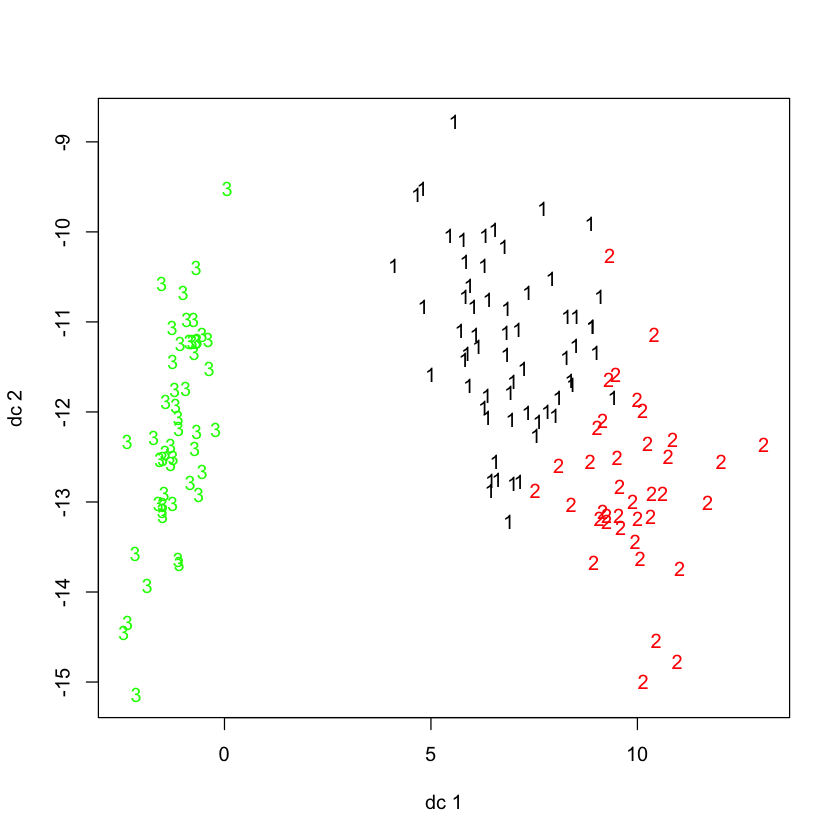

In [349]:

library(cluster) 

 

data(iris) 

 data_for_clustering <- iris[,-5] 

clusters_iris <- kmeans(data_for_clustering, centers = 3) 

plotcluster(data_for_clustering,clusters_iris$cluster) 

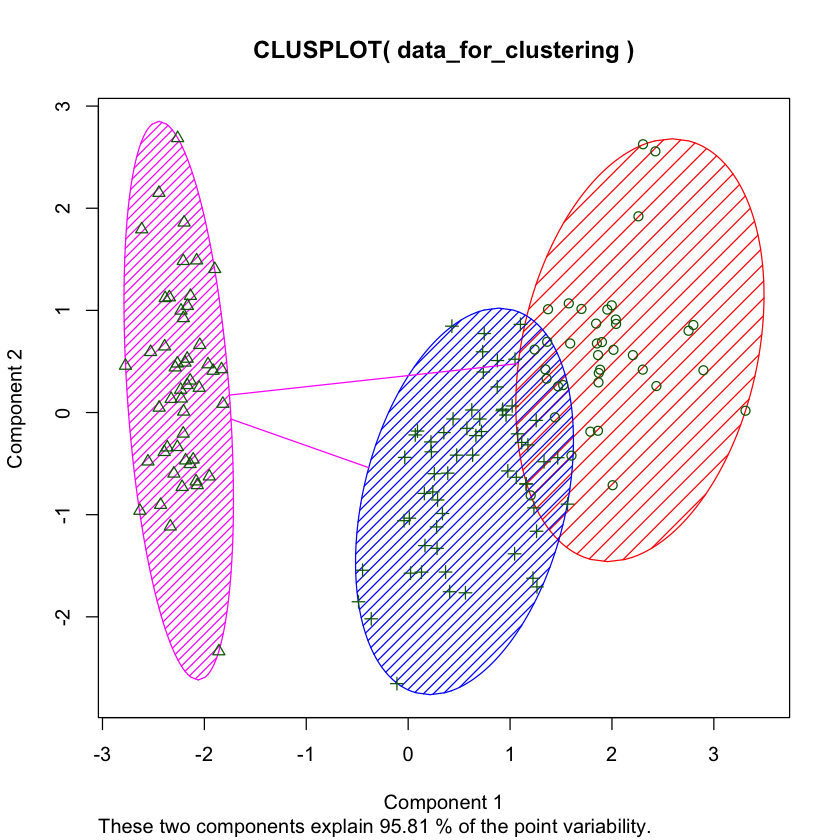

In [347]:
clusplot(data_for_clustering, clusters_iris$cluster, color = TRUE, shade = TRUE)

In [350]:
4.926/2.299

[1] 2.142671

In [134]:
summarise(iris, count=n())

ERROR: Error in summarise(iris, count = n()): could not find function "summarise"


In [135]:
getwd()

[1] "/Users/medamin/Projets/DataScience"

In [204]:
data<- read.csv("~/Downloads/test.csv")


Warning message in file(file, "rt"):
“cannot open file '/Users/medamin/Downloads/test.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [138]:
head(data)

X,Secceed_Count,Failed_Count,Max_Consecutive_Failed_Count,Average_Ping_Time,Difference,Failed_State,Month,Day,Last_Ping_TTL
1,9,0,NA,2,NA,0,6,27,248
2,0,9,9,NA,0,1,6,27,NA
3,9,0,NA,3,NA,0,6,27,248
4,0,9,9,NA,0,1,6,27,NA
5,9,0,NA,2,NA,0,6,27,248
6,9,0,NA,1,NA,0,6,27,57


In [207]:
 
library(dplyr) 

summarize( data$Average_Ping_Time,na.rm()=T,  count=n())

ERROR: Error in parse(text = x, srcfile = src): <text>:3:42: unexpected '='
2: library(dplyr) 
3: summarize( data$Average_Ping_Time,na.rm()=
                                            ^


#  Probability. Concepts

- Odds and log odds 

# Evaluation 

In [196]:
#Write a function to compute the number of non missing and missing observations in 
#a given vector. 
#(Please try your functions for any vector.)
samp.size <- function(x) {
    n_na <- sum(is.na(x)) 
    n_obs <- length(x) - n_na 
    out <- cbind(n_obs, n_na) 
    return(out)
}
nums <- c(1:23,rep(NA,2)) 
samp.size(nums)

n_obs,n_na
23,2


In [ ]:
#library(aod)
library(ggplot2)

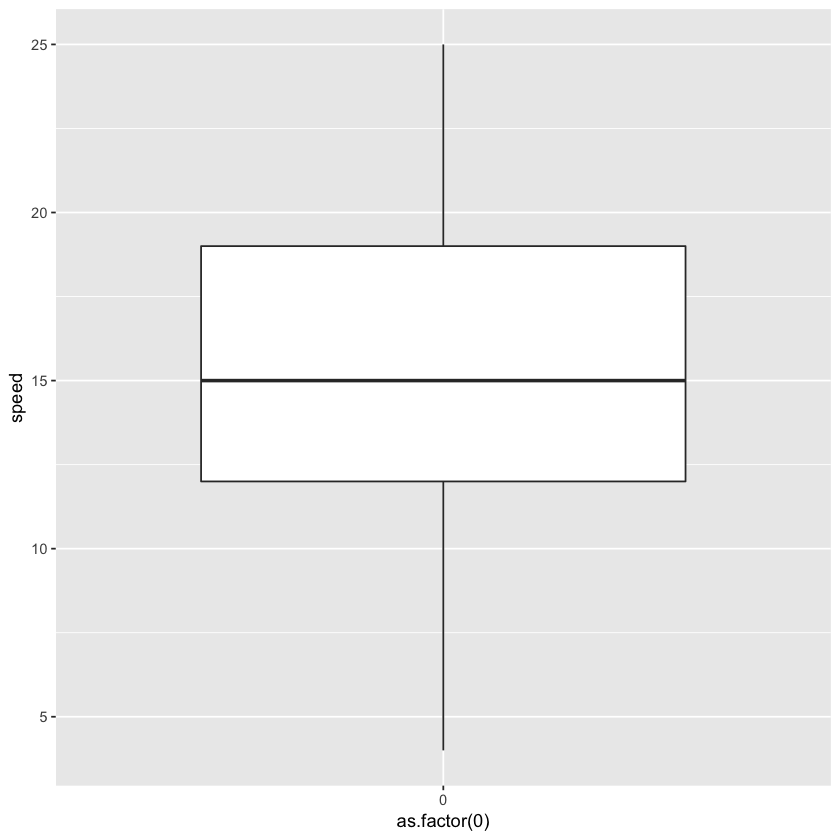

In [3]:
ggplot(cars,aes(x=as.factor(0),y=speed))+geom_boxplot()

In [22]:
quality<-read.csv("https://raw.githubusercontent.com/parulnith/A-guide-to-Machine-Learning-in-R/master/Part%205%20Logistic%20regression%20dataset/quality.csv", header=T)
head(quality)

MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
1,0,0,18,1,731,10,18,21,93,222,FALSE,0,0
2,1,1,6,1,411,0,8,27,19,115,FALSE,1,0
3,0,0,5,3,731,10,5,16,27,148,FALSE,5,0
4,0,1,19,0,158,34,20,14,59,242,FALSE,0,0
5,8,2,19,3,449,10,29,24,51,204,FALSE,0,0
6,2,0,9,2,731,6,11,40,53,156,FALSE,4,1


In [23]:
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


In [20]:
glimpse(quality)

ERROR: Error in glimpse(quality): could not find function "glimpse"


#  Logistic regression LAB

In [5]:
# load dataset from the following URL address:
medic<- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header=F)

In [6]:
head(medic)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [ ]:
# load  medical data
#display 6 first   records


## DATA. cleaning

In [ ]:
# change column names to the following : ( , , , , )
#dsiplay the structure of the dataframe
# notice that. cp and sex are numbers,   change them both to  factors, 


In [7]:
# notice that ca & that have "?" characters for missing data, change all "?"  to.  NA

In [ ]:
# change all  Female gender from 0 to F 
medic[medic$gender==0, ]$gender<- "F"

In [ ]:
# change all  Male gender from 1 to M
medic[medic$gender==1, ]$gender<- "M"

#### convert the following columns to factors:
 - gender 
 - cp
 - fbs
 - restecg
 - exang
 - slope
 

In [ ]:
# turn ca columns to integer 
medci$ca<- as.integer(medic$ca)
# turn it to a factor now
medci$ca<- as.factor(medic$ca)
# do the same thing fro thal 

In [ ]:
# Turn hd. ( heart disease) to a factor with substituting healthy to 0 and unhealthy to 1.
medic$hd<- ifelse(test=medic$hd==0, yes="Healthy", no="Unhealthy")
# turn  hd column to a factor

In [ ]:
# display the structure of our medic dataframe


In [ ]:
#display how many   ca and thal records have NA values
nrow(medic[is.na(medic$ca) |  is.na(medic$thal), ])

In [ ]:
# display all  ca and thal records having NA values
medic[is.na(medic$ca) |  is.na(medic$thal), ]

In [ ]:
# display all dataframe records
nrow(medic)

In [ ]:
# remove all ca and thal records having NA values
medic <- medic[!(is.na(medic$ca) | is.na(medic$thal)), ]

In [ ]:
# display all dataframe records
nrow(medic)

In [ ]:
# heart disease. by gender
xtabs(~ hd +sex, medic)

In [11]:
#  check. if  all. chest pain (cp) levels ar reported by patients 
xtabs(~ hd +  cp , medic)

In [ ]:
# do the same thign for  all boolean and cataegorical variables
xtabs(~ hd +  fbs , medic)
xtabs(~ hd +  restecg , medic)

# notice how many patients have restecg level 1


In [ ]:
xtabs(~ hd +  exang , medic)
xtabs(~ hd +  slope , medic)
xtabs(~ hd +  ca , medic)
xtabs(~ hd +  thal , medic)

## the logistic regression model
 <p style="text-align:center"> 
 try to predict heart dedisease ising only the patient Gender.
</p>

In [ ]:
#  write the logistic regression model epression 
lRmodel<- glm( hd ~ gender, medic, family="binomial")

In [ ]:
# display the logistic regression model  summary 

In [ ]:
# notice the almost symetrical Deciance Residuals values 
